# Task 2.1 + 2.2: Classification with RNN

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(103)

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "classification",  # prediction or classification

    # Model config
    "model": "RNN",  # LSTM or RNN
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 1000,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [3]:
# Save config
# config.save("default_class_rnn")

### Load saved config

In [4]:
config = load_train_config("config_default_class_rnn")
print(config)

Config loaded from: config/config_default_class_rnn.json
CONFIG:
  mode: classification
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: RNN
  input_dim: 96
  hidden_dim: 128
  output_dim: 10
  num_layers: 1
  dropout: 0.0
  epochs: 1000
  lr: 0.3
  batch_size: 128
  eval_steps: 50


## Run FL training

In [5]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

In [6]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3089, val loss: 2.3077, val acc: 0.0686
  Epoch: 50,  train loss: 2.2826, val loss: 2.2552, val acc: 0.2701
  Epoch: 100,  train loss: 2.2401, val loss: 2.1716, val acc: 0.3856
  Epoch: 150,  train loss: 2.1277, val loss: 2.0610, val acc: 0.4230
  Epoch: 200,  train loss: 2.1357, val loss: 1.9469, val acc: 0.4286
  Epoch: 250,  train loss: 2.0793, val loss: 1.8425, val acc: 0.4483
  Epoch: 300,  train loss: 1.9689, val loss: 1.7533, val acc: 0.4645
  Epoch: 350,  train loss: 2.0277, val loss: 1.6803, val acc: 0.4767
  Epoch: 400,  train loss: 1.8611, val loss: 1.6285, val acc: 0.4866
  Epoch: 450,  train loss: 2.0397, val loss: 1.5864, val acc: 0.4912
  Epoch: 500,  train loss: 1.7177, val loss: 1.5551, val acc: 0.4973
  Epoch: 550,  train loss: 1.8221, val loss: 1.5310, val acc: 0.4992
  Epoch: 600,  train loss: 1.8088, val loss: 1.5114, val acc: 0.4971
  Epoch: 650,  train loss: 1.8316, val loss: 1.4961, val acc: 0.5048
  Epoch: 700,  train loss: 1.8

### Analysis

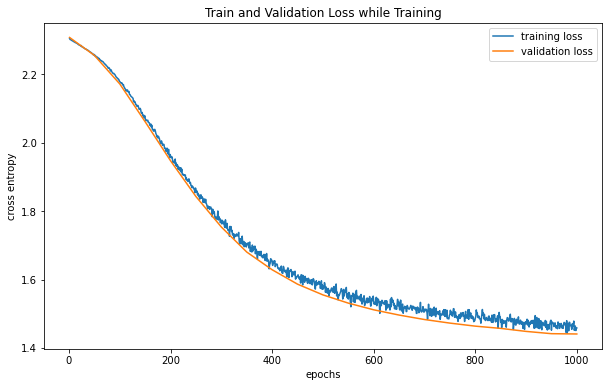

In [7]:
fl.plot_training_loss()

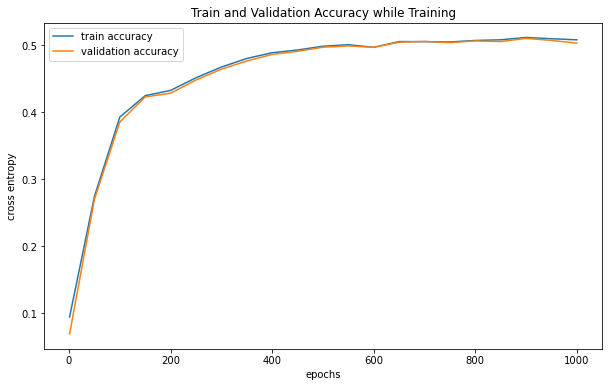

In [8]:
fl.plot_training_accuracy()

In [9]:
fl.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 1.4805
                 precision    recall  f1-score   support

             AC       0.34      1.00      0.51      4650
    Dish washer       0.18      0.05      0.08      3700
Washing Machine       0.57      0.40      0.47      3600
          Dryer       0.58      0.43      0.49      3650
   Water heater       0.96      0.53      0.68      3750
             TV       0.82      0.82      0.82      3250
      Microwave       0.67      0.28      0.39      3500
         Kettle       0.24      0.09      0.13      3550
       Lighting       0.39      0.55      0.45      3300
   Refrigerator       0.82      0.90      0.86      3550

       accuracy                           0.51     36500
      macro avg       0.56      0.50      0.49     36500
   weighted avg       0.55      0.51      0.49     36500



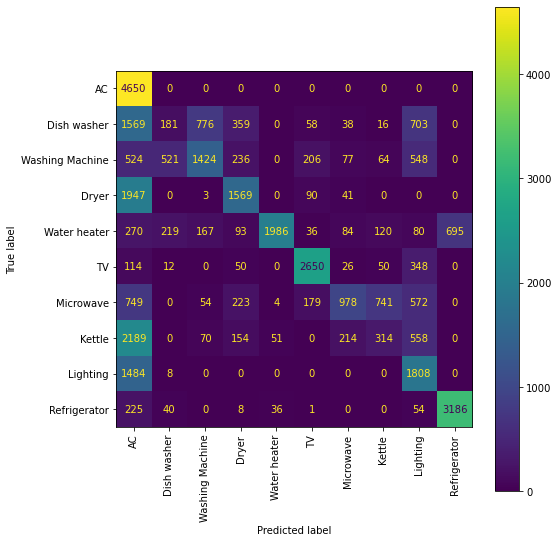

In [10]:
# TODO should this be accuracies? "The confusion matrix should present the classification accuracy for each appliance"
fl.plot_confusion_matrix(x_test, y_test)

## Run training with aggregated data

In [11]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [12]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3150, val loss: 2.3023, val acc: 0.0982
  Epoch: 50,  train loss: 2.2553, val loss: 2.2504, val acc: 0.1998
  Epoch: 100,  train loss: 2.1989, val loss: 2.1678, val acc: 0.2882
  Epoch: 150,  train loss: 2.1011, val loss: 2.0645, val acc: 0.3699
  Epoch: 200,  train loss: 1.9492, val loss: 1.9562, val acc: 0.4071
  Epoch: 250,  train loss: 1.7999, val loss: 1.8564, val acc: 0.4499
  Epoch: 300,  train loss: 1.7747, val loss: 1.7742, val acc: 0.4183
  Epoch: 350,  train loss: 1.7947, val loss: 1.7019, val acc: 0.4318
  Epoch: 400,  train loss: 1.6804, val loss: 1.6435, val acc: 0.4866
  Epoch: 450,  train loss: 1.5846, val loss: 1.6065, val acc: 0.4786
  Epoch: 500,  train loss: 1.6495, val loss: 1.5685, val acc: 0.4934
  Epoch: 550,  train loss: 1.5525, val loss: 1.5451, val acc: 0.4907
  Epoch: 600,  train loss: 1.6229, val loss: 1.5426, val acc: 0.4705
  Epoch: 650,  train loss: 1.4561, val loss: 1.5076, val acc: 0.5011
  Epoch: 700,  train loss: 1.5

### Analysis

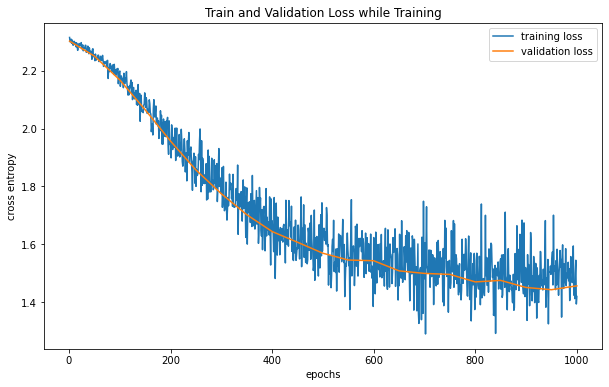

In [13]:
fl_agg.plot_training_loss()

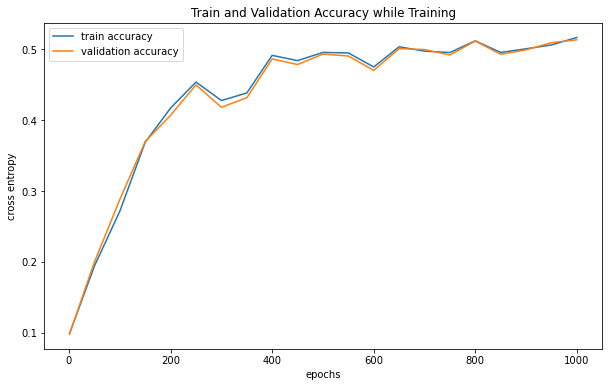

In [14]:
fl_agg.plot_training_accuracy()

In [15]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 1.4929
                 precision    recall  f1-score   support

             AC       0.34      1.00      0.51      4650
    Dish washer       0.17      0.02      0.04      3700
Washing Machine       0.56      0.43      0.49      3600
          Dryer       0.60      0.41      0.49      3650
   Water heater       0.97      0.50      0.66      3750
             TV       0.77      0.88      0.82      3250
      Microwave       0.63      0.35      0.45      3500
         Kettle       0.30      0.06      0.10      3550
       Lighting       0.38      0.55      0.45      3300
   Refrigerator       0.80      0.91      0.85      3550

       accuracy                           0.52     36500
      macro avg       0.55      0.51      0.49     36500
   weighted avg       0.55      0.52      0.48     36500



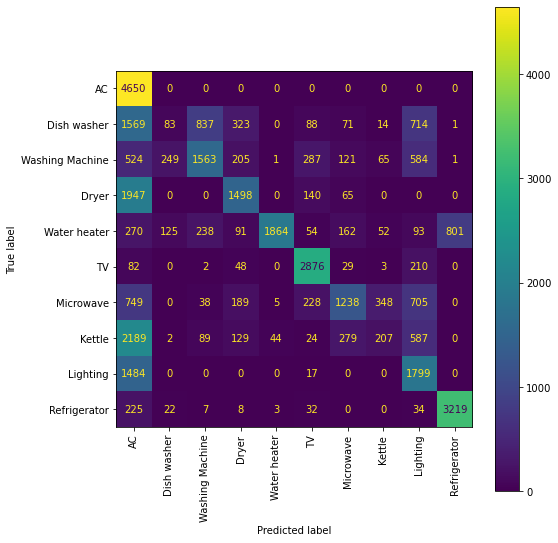

In [16]:
# TODO should this be accuracies? "The confusion matrix should present the classification accuracy for each appliance"
fl_agg.plot_confusion_matrix(x_test, y_test)